In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargar steam_games.csv
df_games = pd.read_csv('Datasets/Datasets ETL/steam_games_v1.csv')

In [3]:
# Configuración de la estética por defecto
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
my_functions.describe_df(df_games)

Cantidad Registros:  32131
Cantidad Campos:  26


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,app_name,object,0,0.0,32131,100.0,32094,99.88
1,game_id,int64,0,0.0,32131,100.0,32131,100.00
2,developer,object,0,0.0,32131,100.0,10993,34.21
3,release_year,int64,0,0.0,32131,100.0,45,0.14
4,gnr_Accounting,int64,0,0.0,32131,100.0,2,0.01
5,gnr_Action,int64,0,0.0,32131,100.0,2,0.01
6,gnr_Adventure,int64,0,0.0,32131,100.0,2,0.01
7,gnr_Animation & Modeling,int64,0,0.0,32131,100.0,2,0.01
8,gnr_Audio Production,int64,0,0.0,32131,100.0,2,0.01
9,gnr_Casual,int64,0,0.0,32131,100.0,2,0.01


In [5]:
# Modificar tipo de columna 'id' a string
df_games['game_id'] = df_games['game_id'].astype(str)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   app_name                   32131 non-null  object
 1   game_id                    32131 non-null  object
 2   developer                  32131 non-null  object
 3   release_year               32131 non-null  int64 
 4   gnr_Accounting             32131 non-null  int64 
 5   gnr_Action                 32131 non-null  int64 
 6   gnr_Adventure              32131 non-null  int64 
 7   gnr_Animation & Modeling   32131 non-null  int64 
 8   gnr_Audio Production       32131 non-null  int64 
 9   gnr_Casual                 32131 non-null  int64 
 10  gnr_Design & Illustration  32131 non-null  int64 
 11  gnr_Early Access           32131 non-null  int64 
 12  gnr_Education              32131 non-null  int64 
 13  gnr_Free to Play           32131 non-null  int64 
 14  gnr_In

### Observaciones iniciales

Como se mencióno en el documento '1.1. ETL games', este dataset tiene como identificador único para cada registro el campo 'game_id'.

Cada 'game_id' tiene a modo de nombre del juego el campo 'app_name' y la empresa desarrolladora en 'developer'.
También cuenta con los valores del año de lanzamiento del juego en 'release_year'.

Por otro lado, tenemos los campos con prefijo 'gnr_' que refieren a los distintos géneros de dicho juego. Cada juego puede tener varios géneros.

No existen valores nulos en todo el dataset, punto que fue trabajado en el ETL.

Se presentan cantidad de valores únicos para cada campo:

- Total registros:                              
32131   (100%)

Valores únicos:
- 'game_id':                     
32131   (100%)

- 'app_name':                    
32094   (99.88%)

- 'developer':                   
10993   (34.21%)

- 'release_year':                
45      (0.14%)

- campos con prefijo 'gnr_':     
2       (0.01%)




### 'game_id' y 'app_name'

Estos campos no requieren mayor exploración en este punto dado el trabajo realizado en el ETL y la información observada.

El campo 'game_id' no tiene valores duplicados (es el identificador único de juegos) ni nulos.

'app_name' tiene algunos valores duplicados que ya fueron explorados en el ETL, tomando la decisión de no realizar modificaciones dado que, a pesar de tener los mismos valores, los registros correspondientes indican que no se trata del mismo contenido.

## Exploración

### 'release_year'

Comenzamos explorando la cantidad de juegos por año de lanzamiento.

In [6]:
# Crear un DataFrame 
grouped_df = df_games.groupby(['release_year']).size().reset_index(name='cantidad_juegos')

# Ordenar por release_year de mayor a menor
grouped_df = grouped_df.sort_values(by='release_year', ascending=False)

# Calcular porcentaje en lugar de la cantidad absoluta
total_juegos = grouped_df['cantidad_juegos'].sum()
grouped_df['porcentaje'] = (grouped_df['cantidad_juegos'] / total_juegos) * 100
grouped_df

,release_year,cantidad_juegos,porcentaje
44,5275,1,0.003112
43,2021,1,0.003112
42,2019,4,0.012449
41,2018,159,0.494849
40,2017,9594,29.859015
39,2016,6943,21.608416
38,2015,4952,15.411908
37,2014,2843,8.848153
36,2013,1552,4.830226
35,2012,1192,3.709813


En primer lugar, se observa un valor de año '5275' el cual claramente es erróneo, por lo que se lo imputa como 0.

In [7]:
# Reemplazar el valor 5275 por 'Sin Datos'
df_games['release_year'] = df_games['release_year'].replace(5275, 0)

Como podría esperarse, se observa una tendencia creciente a medida que pasan los años, la cual se ve interrumpida en 2017. En 2018 hay solo 159 juegos, en 2019 solo 4, ninguno para 2020 y 1 para 2021.
Esto puede deberse a una mala actualización de la información u otro problema.

Se visualizan años donde se lanzaron más de 100.

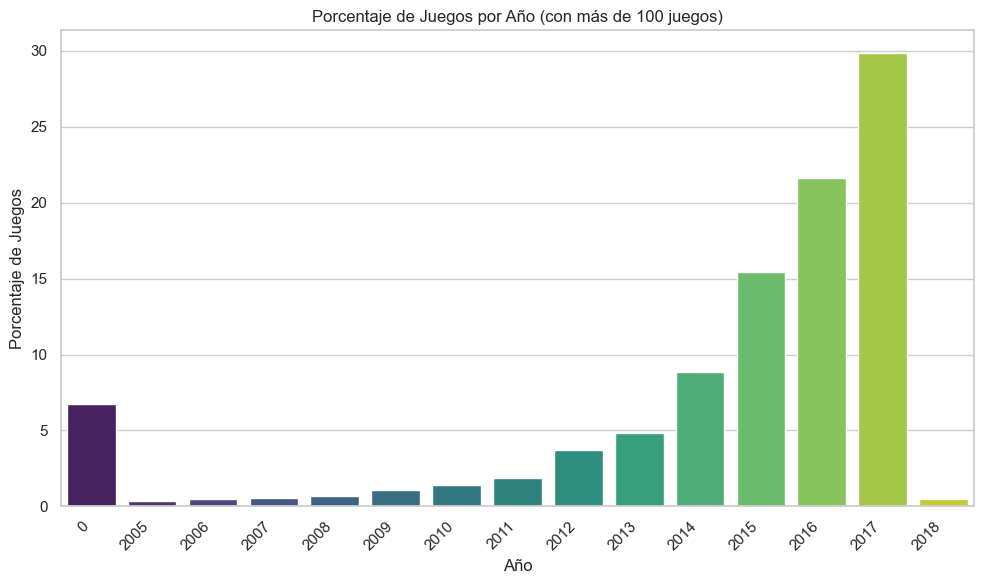

In [8]:
# Filtrar años con cantidad mayor o igual a 100 juegos
filtered_df = grouped_df[grouped_df['cantidad_juegos'] >= 100]

# Crear el gráfico de barras con el DataFrame filtrado
bar_plot = sns.barplot(x=filtered_df['release_year'], y=filtered_df['porcentaje'], palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Año', ylabel='Porcentaje de Juegos', title='Porcentaje de Juegos por Año (con más de 100 juegos)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entre 2005 y 2018 se lanzaron más de 100 juegos por año. Se puede apreciar la tendencia creciente y la caída en 2018.

Entre 2015 y 2017 se concentra aproximadamente el 60% de los juegos. En 2015 un poco más del 15%, en 2016 poco más del 20% y en 2017 casi el 30%, siendo este el año con mayor cantidad juegos lanzados.

Por otro lado, no se cuenta con datos sobre el año de lanzamiento de casi el 7% del total.

Algo que resulta llamativo es que haya juegos a partir de 1970.

Se exploran juegos anteriores al año 2000 para determinar si estos datos son errores o no.

In [9]:
df_filtered = df_games[(df_games['release_year'] < 2000) & (df_games['release_year'] != 0)].sort_values(by='release_year', ascending=True)
df_filtered


,app_name,game_id,developer,release_year,gnr_Accounting,gnr_Action,gnr_Adventure,gnr_Animation & Modeling,gnr_Audio Production,gnr_Casual,...,gnr_Photo Editing,gnr_RPG,gnr_Racing,gnr_Simulation,gnr_Software Training,gnr_Sports,gnr_Strategy,gnr_Utilities,gnr_Video Production,gnr_Web Publishing
19099,Hercules in New York,582750,Sin Datos,1970,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14844,Last Train To Berlin,734030,Sin Datos,1970,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14842,Massacre At Noon,734220,Sin Datos,1975,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19115,Gallagher: An Uncensored Evening,579610,Sin Datos,1980,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9244,Gallagher: Two Real,614510,Sin Datos,1981,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29933,Omikron: The Nomad Soul,243000,Quantic Dream,1999,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29940,Gorky 17,253920,Sin Datos,1999,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
29946,Septerra Core,253940,Sin Datos,1999,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13097,Army Men: Toys in Space,549180,The 3DO Company,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Se determina que son correctos, con lo cual más alla de que resultan datos marginales en terminos cuantitativos, se decide dejarlos.

### 'developer'

Como ya se mencionó, existen mas de 10 mil desarrolladores.

Comenzaremos explorando la distribución de cantidad de juegos del top 10.

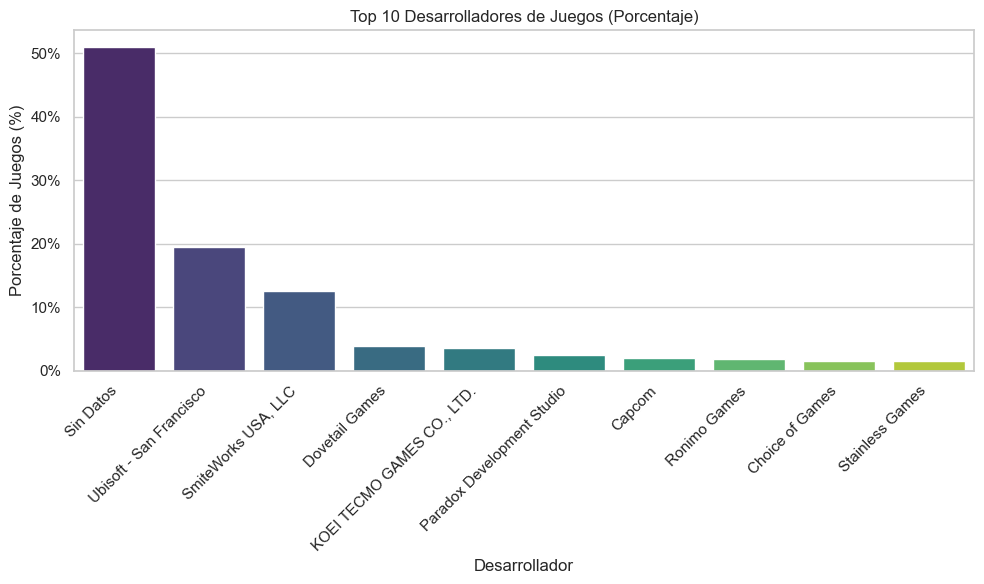

In [10]:
# Obtener el top 10 de desarrolladores
top_developers = df_games['developer'].value_counts().head(10)

# Calcular el porcentaje en lugar de la cantidad absoluta
total_juegos = top_developers.sum()
porcentajes = (top_developers / total_juegos) * 100

# Configuración de la estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras con porcentajes
bar_plot = sns.barplot(x=porcentajes.index, y=porcentajes.values, palette="viridis")

# Configurar etiquetas y título con el símbolo %
bar_plot.set(xlabel='Desarrollador', ylabel='Porcentaje de Juegos (%)', title='Top 10 Desarrolladores de Juegos (Porcentaje)')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar símbolo % a las etiquetas del eje y y mostrar porcentajes enteros
bar_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se observa que más de el 30% de los juegos no tienen información sobre el developer.
Al momento de realizar consultas relativas a los developers se tendrá en cuenta este dato, omitiendo estos registros.

Luego tenemos un developer con casi el 20% y uno con un poco más del 10%.
El resto de los developers tienen menos del 5% del total de juegos.

### Relación 'developer' / 'release_year'

Vamos a examinar el máximo desarrollador de juegos para cada año.

In [11]:
# Crear un DataFrame que contenga developer, release_year agrupados, y cantidad de juegos
grouped_df = df_games.groupby(['developer', 'release_year']).size().reset_index(name='cantidad_juegos')

# Filtrar registros con developer sin datos
grouped_df = grouped_df[grouped_df['developer'] != 'Sin Datos']

# Filtrar registros con developer sin datos
# grouped_df = grouped_df[grouped_df['release_year'] != '0']

# Encontrar para cada release_year el developer con mayor cantidad de juegos
max_games_df = grouped_df.loc[grouped_df.groupby('release_year')['cantidad_juegos'].idxmax()]

# Ordenar por release_year de mayor a menor
max_games_df = max_games_df.sort_values(by='release_year', ascending=False)

# Concatenar el año y el desarrollador separados por una coma
max_games_df['año_desarrollador'] = max_games_df.apply(lambda row: f"{row['release_year']}, {row['developer']}", axis=1)

# Descartar las columnas 'developer' y 'release_year'
max_games_df = max_games_df.drop(['developer', 'release_year'], axis=1)

# Mostrar el DataFrame resultante
max_games_df

,cantidad_juegos,año_desarrollador
4858,1,"2021, Freebird Games"
8800,1,"2019, Ninetales Studios"
9828,5,"2018, Poppermost Productions"
11565,428,"2017, SmiteWorks USA, LLC"
13315,247,"2016, Ubisoft - San Francisco"
13314,248,"2015, Ubisoft - San Francisco"
13313,265,"2014, Ubisoft - San Francisco"
13312,116,"2013, Ubisoft - San Francisco"
13311,114,"2012, Ubisoft - San Francisco"
10435,18,"2011, Relic Entertainment,Feral Interactive (M..."


Se exploran años con al menos 20 juegos lanzados.

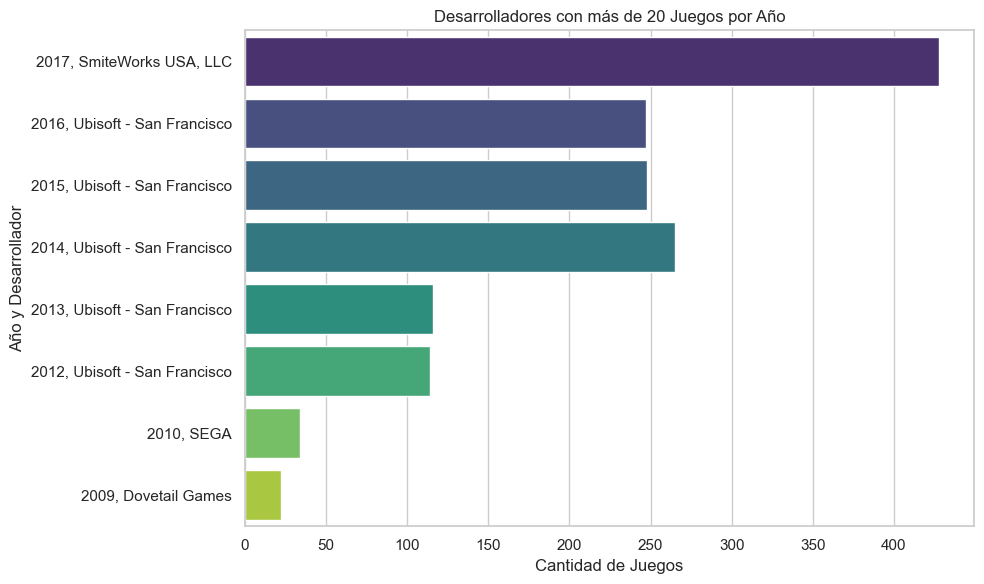

In [12]:
# Filtrar registros con cantidad_juegos > 20
filtered_df = max_games_df[max_games_df['cantidad_juegos'] > 20]

# Crear el gráfico 
bar_plot = sns.barplot(y=filtered_df['año_desarrollador'], x=filtered_df['cantidad_juegos'], palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Cantidad de Juegos', ylabel='Año y Desarrollador', title='Desarrolladores con más de 20 Juegos por Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se pueden apreciar 4 períodos diferenciados:
- 2009-2010: menos de 35 juegos.
- 2011: no aparece en el gráfico dado que hay menos de 20 juegos.
- 2012-2013: más de 100 juegos.
- 2014-2016: ronando los 250 juegos. 
- 2017: más de 400 juegos.

Entre 2012 y 2016 'Ubisoft - San Francisco' fue el desarrollador con más lanzamientos por año, con un pico mayor a 250 juegos en 2014, cayendo un poco en 2015 y 2016. Como ya se observó, este desarrollador es el que más lanzamientos totales realizó, con casi el 20% del total.

En 2017 se observa a 'SmiteWorks USA, LLC' (desarrollador con más del 10% del total de juegos) que lanzó aproximadamente 450 juegos, representando un salto cuantitativo importante en relación a los máximos valores de lanzamientos por año de otras desarrolladoras.

### 'genres'

En primer lugar se explora la distribución de juegos por género.

In [13]:
# Filtrar las columnas con el prefijo 'gnr_'
genre_columns = df_games.filter(like='gnr_')

# Sumar las cantidades por columna
total_por_genero = genre_columns.sum()

# Crear un nuevo DataFrame con nombres de columnas
df_total_por_genero = pd.DataFrame({'genero': total_por_genero.index.str.replace('gnr_', ''),
                                     'cantidad_juegos': total_por_genero.values})

# Ordenar por cantidad de juegos de mayor a menor
df_total_por_genero = df_total_por_genero.sort_values(by='cantidad_juegos', ascending=False)

# Calcular la suma total de juegos
total_juegos_total = df_total_por_genero['cantidad_juegos'].sum()

# Calcular porcentajes y agregar una nueva columna al DataFrame
df_total_por_genero['porcentaje'] = (df_total_por_genero['cantidad_juegos'] / total_juegos_total) * 100

# Mostrar el total por género
df_total_por_genero


,genero,cantidad_juegos,porcentaje
10,Indie,15857,22.162434
1,Action,11318,15.818530
5,Casual,8282,11.575284
2,Adventure,8242,11.519378
18,Strategy,6957,9.723406
15,Simulation,6699,9.362814
13,RPG,5479,7.657689
9,Free to Play,2031,2.838614
7,Early Access,1462,2.043355
17,Sports,1257,1.756838


Se observan varios géneros con menos de mil juegos y que en todos estos casos no parecen ser géneros de juegos sino de software de otros tipos.

In [14]:
# Lista de géneros
generos_especificos = ['gnr_Design & Illustration', 'gnr_Utilities', 'gnr_Web Publishing', 'gnr_Animation & Modeling', 'gnr_Education', 'gnr_Video Production', 'gnr_Software Training', 'gnr_Audio Production', 'gnr_Photo Editing', 'gnr_Accounting']

# Contar la cantidad de registros que tienen 1 en al menos uno de los géneros específicos
cantidad_registros = df_games[generos_especificos].eq(1).any(axis=1).sum()

# Mostrar la cantidad de registros
print(f"Cantidad de registros con al menos uno de estos géneros: {cantidad_registros}")

Cantidad de registros con al menos uno de estos géneros: 799


En total son 799 registros. Se exploran para definir como tratárlos.

In [15]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# Lista de géneros
generos_especificos = ['gnr_Design & Illustration', 'gnr_Utilities', 'gnr_Web Publishing', 'gnr_Animation & Modeling', 
                        'gnr_Education', 'gnr_Video Production', 'gnr_Software Training', 'gnr_Audio Production', 
                        'gnr_Photo Editing', 'gnr_Accounting']

# Filtrar filas donde al menos uno de los géneros específicos tiene valor 1
df_filtered_genres = df_games[df_games[generos_especificos].eq(1).any(axis=1)]

# Mostrar el DataFrame resultante
df_filtered_genres


,app_name,game_id,developer,release_year,gnr_Accounting,gnr_Action,gnr_Adventure,gnr_Animation & Modeling,gnr_Audio Production,gnr_Casual,...,gnr_Photo Editing,gnr_RPG,gnr_Racing,gnr_Simulation,gnr_Software Training,gnr_Sports,gnr_Strategy,gnr_Utilities,gnr_Video Production,gnr_Web Publishing
992,Source Filmmaker,1840,Valve,2012,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1093,3D-Coat V4.8,100980,Pilgway,2012,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1269,3DMark,223850,Futuremark,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1296,RPG Maker VX Ace - High Fantasy 2 Resource Pack,229751,PV Games,2013,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1366,Driver Fusion Premium,234820,Treexy,2017,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30477,ACDSee 15,220960,ACD Systems International Inc.,2012,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30714,3DMark 11,205270,Futuremark,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31915,Radius-Wing SHMUP 3d Models,774931,BrashMonkey,2017,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32071,BASIC8,767240,Tony Wang,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Para ver la lista completa se pueden quitar los # en las siguientes lineas de código.

In [16]:
# pd.set_option('display.max_rows', None)
# df_filtered_genres

Habiendo realizado una exploración de todos ellos se determina que no son juegos sino programas, por lo cual se decide eliminarlos.

In [17]:
# Eliminar los registros con géneros específicos
df_games = df_games[~df_games[generos_especificos].eq(1).any(axis=1)]

# Eliminar las columnas correspondientes
df_games = df_games.drop(columns=generos_especificos)

# Mostrar el DataFrame resultante
df_games.head(1)


,app_name,game_id,developer,release_year,gnr_Action,gnr_Adventure,gnr_Casual,gnr_Early Access,gnr_Free to Play,gnr_Indie,gnr_Massively Multiplayer,gnr_RPG,gnr_Racing,gnr_Simulation,gnr_Sports,gnr_Strategy
0,Lost Summoner Kitty,761140,Kotoshiro,2018,1,0,1,0,0,1,0,0,0,1,0,1


Se verifica la eliminación de los registros y de las columnas correspondientes a esos generos.

In [18]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31332 entries, 0 to 32130
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   app_name                   31332 non-null  object
 1   game_id                    31332 non-null  object
 2   developer                  31332 non-null  object
 3   release_year               31332 non-null  int64 
 4   gnr_Action                 31332 non-null  int64 
 5   gnr_Adventure              31332 non-null  int64 
 6   gnr_Casual                 31332 non-null  int64 
 7   gnr_Early Access           31332 non-null  int64 
 8   gnr_Free to Play           31332 non-null  int64 
 9   gnr_Indie                  31332 non-null  int64 
 10  gnr_Massively Multiplayer  31332 non-null  int64 
 11  gnr_RPG                    31332 non-null  int64 
 12  gnr_Racing                 31332 non-null  int64 
 13  gnr_Simulation             31332 non-null  int64 
 14  gnr_Sports 

Se explora nuevamente la distribución por géneros.

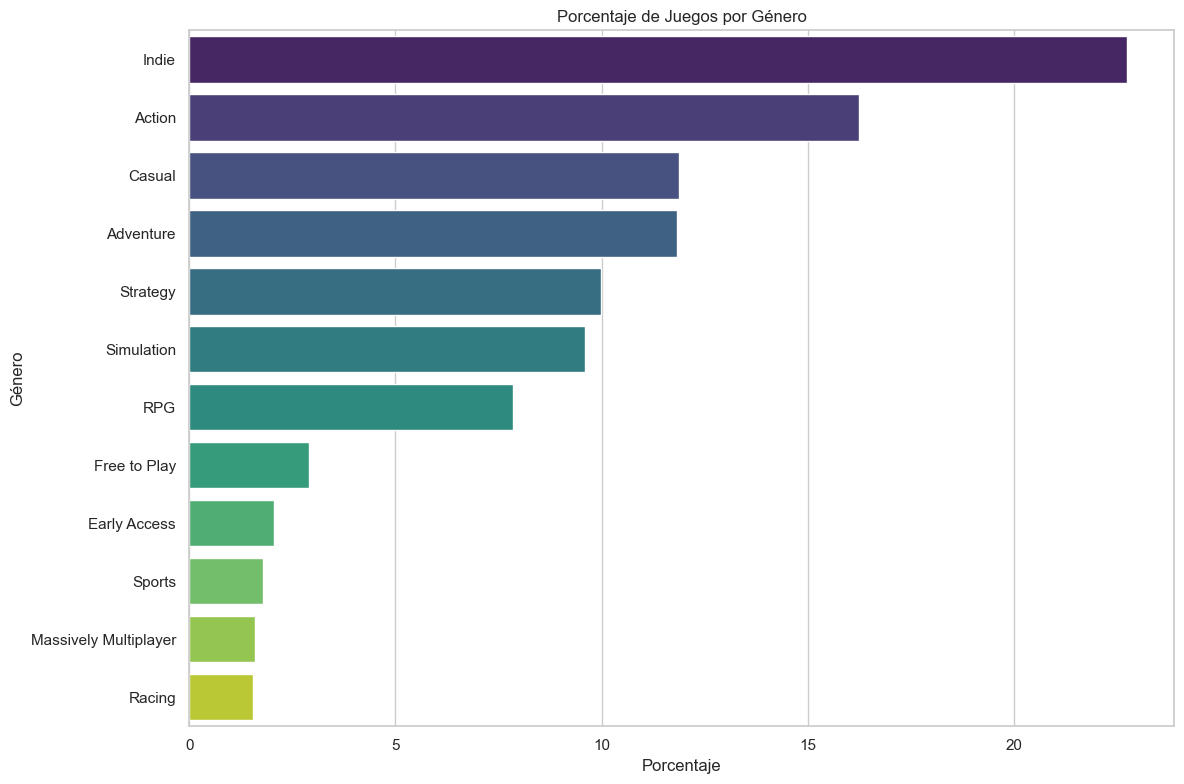

,genero,cantidad_juegos,porcentaje
5,Indie,15855,22.732812
0,Action,11317,16.226253
2,Casual,8280,11.871819
1,Adventure,8242,11.817335
11,Strategy,6957,9.974909
9,Simulation,6698,9.603556
7,RPG,5478,7.854326
4,Free to Play,2031,2.912037
3,Early Access,1439,2.063230
10,Sports,1257,1.802280


In [19]:
# Filtrar las columnas con el prefijo 'gnr_'
genre_columns = df_games.filter(like='gnr_')

# Sumar las cantidades por columna
total_por_genero = genre_columns.sum()

# Crear un nuevo DataFrame con nombres de columnas
df_total_por_genero = pd.DataFrame({'genero': total_por_genero.index.str.replace('gnr_', ''),
                                     'cantidad_juegos': total_por_genero.values})

# Ordenar por cantidad de juegos de mayor a menor
df_total_por_genero = df_total_por_genero.sort_values(by='cantidad_juegos', ascending=False)

# Calcular la suma total de juegos
total_juegos_total = df_total_por_genero['cantidad_juegos'].sum()

# Calcular porcentajes y agregar una nueva columna al DataFrame
df_total_por_genero['porcentaje'] = (df_total_por_genero['cantidad_juegos'] / total_juegos_total) * 100

# Configuración de la estética
sns.set(style="whitegrid", palette="viridis")
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
bar_plot = sns.barplot(x='porcentaje', y='genero', data=df_total_por_genero, palette="viridis")

# Configurar etiquetas y título
bar_plot.set(xlabel='Porcentaje', ylabel='Género', title='Porcentaje de Juegos por Género')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar el total por género
df_total_por_genero

Habiendo realizado esta depuración nos quedan 12 géneros.

Vale recordar que hay juegos que tienen señalado más de un género, pero los datos obtenidos sirven para visualizar cuáles son los más frecuentes.

Más de un 60% están comprendidos entre los géneros Indie, Action, Casual y Adventure. 
El resto de los géneros tienen menos de un 10%.

Para todos los géneros hay por lo menos 1000 juegos.

In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31332 entries, 0 to 32130
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   app_name                   31332 non-null  object
 1   game_id                    31332 non-null  object
 2   developer                  31332 non-null  object
 3   release_year               31332 non-null  int64 
 4   gnr_Action                 31332 non-null  int64 
 5   gnr_Adventure              31332 non-null  int64 
 6   gnr_Casual                 31332 non-null  int64 
 7   gnr_Early Access           31332 non-null  int64 
 8   gnr_Free to Play           31332 non-null  int64 
 9   gnr_Indie                  31332 non-null  int64 
 10  gnr_Massively Multiplayer  31332 non-null  int64 
 11  gnr_RPG                    31332 non-null  int64 
 12  gnr_Racing                 31332 non-null  int64 
 13  gnr_Simulation             31332 non-null  int64 
 14  gnr_Sports 

## 'steam_games_v2.csv'

Se guarda el dataframe generado en un nuevo archivo, que se utilizará en próximos pasos del proyecto.

In [21]:
df_games.to_csv('Datasets/Datasets ETL/steam_games_v2.csv', index=False, encoding='utf-8')